In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from task1_utils import generateDataVectors,forward_pass,loss,getConfused,getErrorRate

In [57]:
features = ["SepalLength",
            "SepalWidth",
            "PetalLength",
            "PetalWidth",
            "Class"]

irisData = pd.read_csv("data/IrisData/iris.data", 
                   names=features)

# Take 30 first samples of each Class for training
train_data = irisData.groupby("Class").head(30)
test_data = irisData.drop(train_data.index)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)

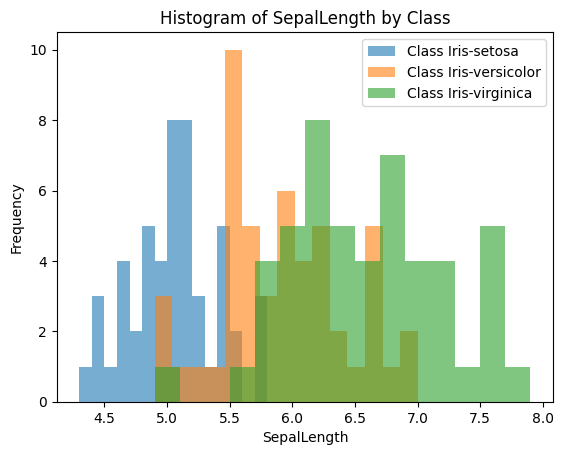

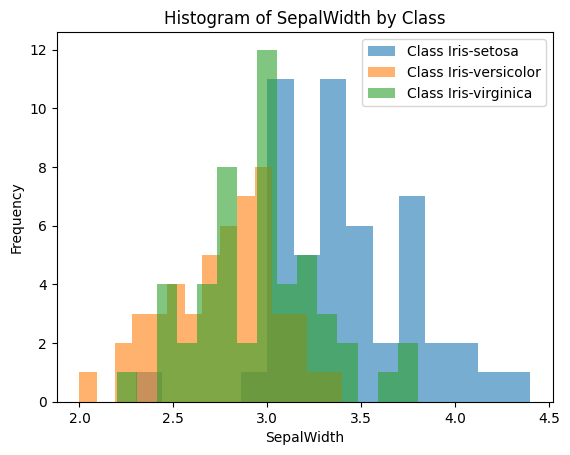

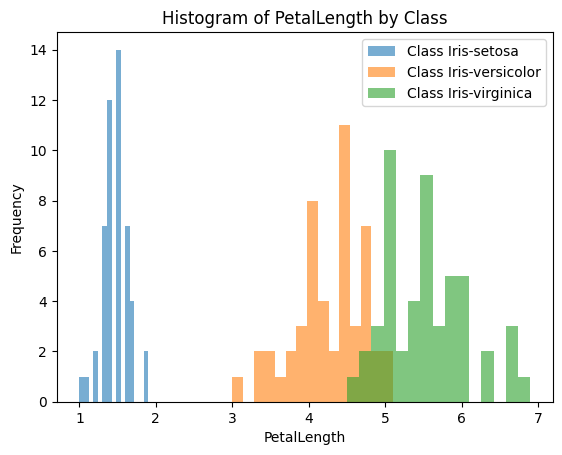

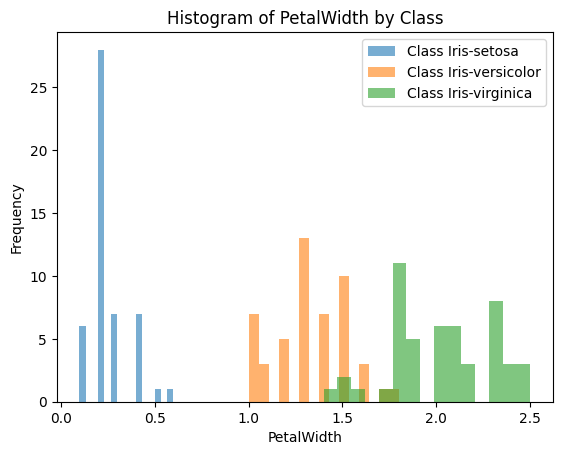

In [58]:
# Plot histogram by class
classes = irisData['Class'].unique()
for f_idx in range(4):
    plt.figure()
    for c in classes:
        subset = irisData[irisData['Class'] == c]
        plt.hist(subset[features[f_idx]], bins=15, alpha=0.6, label=f'Class {c}')

    plt.xlabel(f'{features[f_idx]}')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {features[f_idx]} by Class')
    plt.legend()
    plt.show()

SepalWidth has the most overlap and will be removed

In [59]:
# Training with 3 features - SepalWidth removed

train_data = train_data.drop(["SepalLength", "SepalWidth", 'PetalWidth'], axis=1)
test_data = test_data.drop(["SepalLength", "SepalWidth", "PetalWidth"], axis=1)
# print(test_data)

# Generate data vectors
x_train, t_train = generateDataVectors(train_data)
x_test, t_test = generateDataVectors(test_data)
x_total = np.hstack((x_train, x_test))
t_total = np.hstack((t_train, t_test))

print(x_train.shape, t_train.shape, x_test.shape, t_test.shape)
print(x_total.shape, t_total.shape)

# initialize the weights
np.random.seed(42)

n_features = x_train.shape[0]
n_classes = t_train.shape[0]

W = np.random.randn(n_classes,n_features)

for i in range(10**6):
    # Forward pass
    g = forward_pass(x_train, W)

    # Loss
    MSE = loss(g,t_train)

    # Backward pass
    grad_MSE = ((g-t_train)*g*(1-g))@x_train.transpose()

    alpha = 0.001

    W = W - alpha*grad_MSE

print(MSE)

predictions_train = forward_pass(x_train,W)
predictions_test = forward_pass(x_test,W)

train_conf_matrix = getConfused(predictions_train, t_train)
test_conf_matrix = getConfused(predictions_test, t_test)



print(train_conf_matrix)
print(f"{getErrorRate(train_conf_matrix):.4f}")
print(test_conf_matrix)
print(f"{getErrorRate(test_conf_matrix):.4f}")


(2, 90) (3, 90) (2, 60) (3, 60)
(2, 150) (3, 150)
11.584877525808833
[[30.  0.  0.]
 [ 0. 27.  3.]
 [ 0.  2. 28.]]
0.0588
[[20.  0.  0.]
 [ 0. 19.  1.]
 [ 0.  1. 19.]]
0.0345


# 3 features - SepalWith removed:

## First 30 are train last 20 are test:

MSE = 9.594

### Validation with training data:
[30.  0.  0.]\
[ 0. 29.  1.]\
[ 0.  0. 30.]

Error rate = 0.0112
### Validation with test data:
[20.  0.  0.]\
[ 0. 18.  2.]\
[ 0.  1. 19.]

Error rate = 0.0526

# 2 features - Petal remaining - Sepal removed

## First 30 are train last 20 are test:

MSE = 10.366

### Validation with training data:
[30.  0.  0.]\
[ 0. 28.  2.]\
[ 0.  1. 29.]

Error rate = 0.0345
### Validation with test data:
[20.  0.  0.]\
[ 0. 20.  0.]\
[ 0.  2. 18.]

Error rate = 0.0345

# 1 feature - Petalwidth:

## First 30 are train last 20 are test:

MSE = 11.311

### Validation with training data:
[30.  0.  0.]\
[ 0. 28.  2.]\
[ 0.  2. 28.]

Error rate = 0.0465
### Validation with test data:
[20.  0.  0.]\
[ 0. 20.  0.]\
[ 0.  2. 18.]

Error rate = 0.0345

# 1 feature - PetalLength:

## First 30 are train last 20 are test:

MSE = 11.585

### Validation with training data:
[30.  0.  0.]\
[ 0. 27.  3.]\
[ 0.  2. 28.]

Error rate = 0.0588
### Validation with test data:
[20.  0.  0.]\
[ 0. 19.  1.]\
[ 0.  1. 19.]

Error rate = 0.0345


